<a href="https://colab.research.google.com/github/AmraNazar/AmraNazar/blob/main/Final_Python_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Python Notebook 2: Classification Modelling & Evaluation**
### **Author:** Amra Nazar
### **Peer Reviewer:** Krithiga Thachanamoorthy
### **Date of Peer Review:** 15/03/2024

This notebook continues from Final Python Notebook 1 and performs classification modelling on the cleaned cancer mortality dataset. It includes model training, accuracy checks, hyperparameter tuning, and comprehensive visualizations for model evaluation and interpretation.

Three key models were selected based on coursework requirements and clinical interpretability:  

1. **Logistic Regression**:  
   - Linear model for binary classification  
   - Provides probability estimates and feature coefficients  

2. **Naive Bayes**:  
   - Probabilistic classifier based on Bayes' theorem  
   - Handles categorical features effectively

3. **K-Nearest Neighbors (KNN)**:  
   - Instance-based learning  
   - Non-parametric approach suitable for medical data


The models are evaluated using multiple metrics and visualized through ROC curves and confusion matrices.

## **1. Importing Required Libraries**

This section imports essential libraries for data handling, preprocessing, model training, and evaluation. The code aligns with best practices for classification tasks

*Source: Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning.*

In [ ]:
# Import libraries for data handling and preprocessing
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations
from sklearn.model_selection import train_test_split  # Data splitting

# Import classifiers and evaluation metrics
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, f1_score  # For evaluation metrics

# Hyperparameter tuning and visualization
from sklearn.model_selection import GridSearchCV  # Grid search
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Enhanced visualizations


## **2. Loading and Preparing the Dataset**

The dataset Cleaned_Mortality_Data-1.csv is loaded.

*Source: Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.2, q.3.*

In [ ]:
# Load cleaned dataset
df = pd.read_csv('/content/Cleaned_Mortality_Data.csv')  # From Notebook 1
# Check a sample of the dataset
df.head()


,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumour_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status,Precise_Age,Lymph_Node_Ratio
0,0,1,1,1,2,3,2,4.0,1,1,24.0,1,0,68.000000,0.041667
1,0,2,2,3,1,2,2,35.0,1,1,14.0,5,0,50.000000,0.357143
2,0,3,3,5,1,2,2,63.0,1,1,14.0,7,0,58.083333,0.500000
3,0,1,1,1,2,3,2,18.0,1,1,2.0,1,0,58.750000,0.500000
4,0,2,1,2,2,3,2,41.0,1,1,3.0,1,0,47.916667,0.333333


## **3. Exploration of the dataset**

This is necessary to understand the dataset.

*Sources:*

*Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.4, q.3.*

*Week 4: Seminar Session 3 - Week4_NB_KNN_Gridesearch V3.0.docx, pg.2, pg.3.*

In [ ]:
# List all column names in the dataset
list(df.columns)

# Display data types for all columns
df.info()

# Display the number of rows and columns in the dataset
print(df.shape)

# Show basic statistics for numeric columns
df.describe().transpose()

# Show missing values for each column
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sex                     3262 non-null   int64  
 1   T_Stage                 3262 non-null   int64  
 2   N_Stage                 3262 non-null   int64  
 3   6th_Stage               3262 non-null   int64  
 4   Differentiated          3262 non-null   int64  
 5   Grade                   3262 non-null   int64  
 6   A_Stage                 3262 non-null   int64  
 7   Tumour_Size             3262 non-null   float64
 8   Estrogen_Status         3262 non-null   int64  
 9   Progesterone_Status     3262 non-null   int64  
 10  Regional_Node_Examined  3262 non-null   float64
 11  Regional_Node_Positive  3262 non-null   int64  
 12  Mortality_Status        3262 non-null   int64  
 13  Precise_Age             3262 non-null   float64
 14  Lymph_Node_Ratio        3262 non-null   

,0
Sex,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumour_Size,0
Estrogen_Status,0
Progesterone_Status,0


## **4. Data Scaling for Classification Models**

In this coursework, we need to ensure our numeric features are on a similar scale to improve the performance of classification algorithms such as logistic regression, KNN, and Naive Bayes. Using Min-Max scaling is recommended when you want all values to be within the range and avoid negative numbers. This is particularly important for algorithms sensitive to feature magnitude and distance calculations.

Scale only the relevant continuous/numeric variables (Tumour_Size, Regional_Node_Examined, Regional_Node_Positive, Precise_Age, Lymph_Node_Ratio) in the dataset. Categorical variables are not scaled.

*Source: Week 2- Seminar Session 1 - 5DATA002W.2 Tutorial 1 v4.o.docx, pg.43, pg.44.*

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler

# Select only the numeric columns to scale (as per your dataset and Tutorial 3)
numeric_cols = ['Tumour_Size', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Precise_Age', 'Lymph_Node_Ratio']

# Initialize the MinMaxScaler to scale between 0 and 1
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the first few rows of the scaled dataframe
df_scaled.head()


,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumour_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status,Precise_Age,Lymph_Node_Ratio
0,0,1,1,1,2,3,2,0.043478,1,1,0.696970,0.000000,0,0.951983,0.012626
1,0,2,2,3,1,2,2,0.492754,1,1,0.393939,0.571429,0,0.501044,0.337662
2,0,3,3,5,1,2,2,0.898551,1,1,0.393939,0.857143,0,0.703549,0.484848
3,0,1,1,1,2,3,2,0.246377,1,1,0.030303,0.000000,0,0.720251,0.484848
4,0,2,1,2,2,3,2,0.579710,1,1,0.060606,0.000000,0,0.448852,0.313131


# **5. Balancing Classes for Classification**

Class imbalance—where one class dominates—can skew models and reduce detection of the minority class. It’s common to address this during data cleaning after handling missing values and fixing errors. Popular techniques include oversampling (e.g., SMOTE, RandomOverSampler) and undersampling. These are applied before splitting data for training/testing. Balancing ensures fair model learning and minimizes bias.

This code uses SMOTE to balance the dataset.

**External References:**

Sources:

GeeksforGeeks (2024) ‘Handling Imbalanced Data for Classification’. Available at: https://www.geeksforgeeks.org/handling-imbalanced-data-for-classification/ (Accessed: 25 April 2025).

Innovatiana (2024) ‘Strategies for balancing your training dataset’. Available at: https://en.innovatiana.com/post/how-to-balance-training-datasets (Accessed: 25 April 2025).

KDnuggets (2023) ‘7 Steps to Mastering Data Cleaning and Preprocessing Techniques’. Available at: https://www.kdnuggets.com/2023/08/7-steps-mastering-data-cleaning-preprocessing-techniques.html (Accessed: 25 April 2025).

**Approval for external code usage:**

**Tutor's Name:** Sahan Priyanayana

**Peer Reviewer:** Krithiga Thachanamoorthy

**Date:** 15/03/2025

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('Mortality_Status', axis=1)
y = df['Mortality_Status']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# Combine back into a single DataFrame if desired
data = X_bal.copy()
data ['Mortality_Status'] = y_bal

# Check new class distribution
print(data['Mortality_Status'].value_counts())



Mortality_Status
0    2893
1    2893
Name: count, dtype: int64


## **6. Saving and Loading the Modified Dataset**

As in previous steps the dataset was modified by balancing and scaling that helps for classification.

*Source: Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.2, q.3.*

In [ ]:
# save the scaled and balanced dataset for further modeling
data.to_csv('Modified_Mortality_Data.csv', index=False)

# Load the cleaned mortality dataset
data = pd.read_csv('/content/Modified_Mortality_Data.csv')
# Display the first 5 rows to check the data loaded correctly [6]
data.head()

,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumour_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Precise_Age,Lymph_Node_Ratio,Mortality_Status
0,0,1,1,1,2,3,2,4.0,1,1,24.0,1,68.000000,0.041667,0
1,0,2,2,3,1,2,2,35.0,1,1,14.0,5,50.000000,0.357143,0
2,0,3,3,5,1,2,2,63.0,1,1,14.0,7,58.083333,0.500000,0
3,0,1,1,1,2,3,2,18.0,1,1,2.0,1,58.750000,0.500000,0
4,0,2,1,2,2,3,2,41.0,1,1,3.0,1,47.916667,0.333333,0


## **7. Feature and Target Selection**

We select which columns are input features (X) and which is the target (y). Here, we use all columns except 'Mortality_Status' as features, and 'Mortality_Status' as the target to predict.

*Sources:*

*Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.6*

*Week 4: Seminar Session 3 - Week4_NB_KNN_Gridesearch V3.0.docx, pg.7.*


In [ ]:
# Select input features and target variable
feature_cols = [col for col in df.columns if col != 'Mortality_Status']
X = data[feature_cols]
y = data['Mortality_Status']
# List feature names and check target class balance
print("Features:", list(X.columns))
print("Target value counts:\n", y.value_counts())


Features: ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumour_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Precise_Age', 'Lymph_Node_Ratio']
Target value counts:
 Mortality_Status
0    2893
1    2893
Name: count, dtype: int64


## **8. Train-Test Split**

Source: Code Reuse Session 2, q.7, q.8; Tutorial 3, Step 5
We split the dataset into training and test sets. The training set is used to build the model, and the test set is used to check how well the model works on new, unseen data. Stratifying ensures both sets have the same proportion of each class.

*Sources:*

*Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.7, q.8*

*Week 4: Seminar Session 3 - Week4_NB_KNN_Gridesearch V3.0.docx, pg.7.*

In [ ]:
# Split data into training and test sets, stratifying by target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)


Training set shape: (2609, 14)
Test set shape: (653, 14)


## **9. Logistic Regression Model**

**9.1. Training Logistic Regression Model**

We build a Logistic Regression model to predict mortality status. This model learns from the training data to find the best relationship between the input features and the target.

*Source: Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.9 q.10, q.11*

In [ ]:
# Declare and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
# Make predictions on training and test data
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)


**9.2 Logistic Regression Evaluation**

We check how well the Logistic Regression model performs using accuracy, confusion matrix, classification report, and ROC curve. This tells us how good the model is at predicting the correct class.

*Source: Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.15 q.16, q.17, q.18, q.19*

Training Accuracy: 0.6957649092480553
Test Accuracy: 0.697754749568221
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       579
           1       0.73      0.63      0.67       579

    accuracy                           0.70      1158
   macro avg       0.70      0.70      0.70      1158
weighted avg       0.70      0.70      0.70      1158

Logistic Regression AUC: 0.6977547495682211


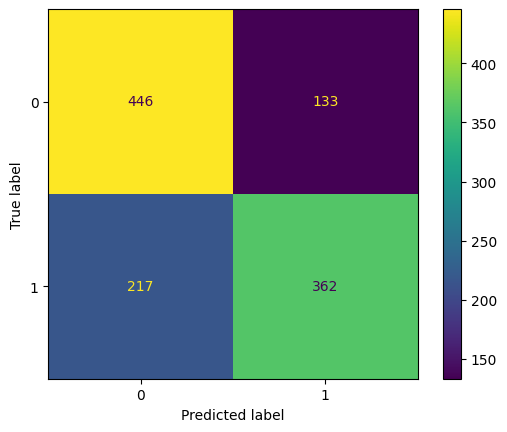

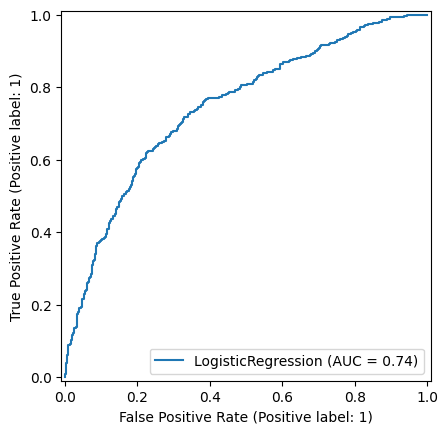

In [ ]:
# Calculate accuracy on training and test data
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# Show classification report for test data
print(classification_report(y_test, y_pred_test))

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, y_pred_test, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()

# Plot ROC curve for test data
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

# AUC score
auc_lr = roc_auc_score(y_test, y_pred_test)
print("Logistic Regression AUC:", auc_lr)


**9.1 Baseline Model: Logistic Regression**

We first train a Logistic Regression model with default parameters and evaluate it using a consistent framework: Accuracy Score, Classification Report, ROC Curve & AUC.

*Source: Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.9 - 11 , q.15 -19.*

Accuracy Score: 0.888208269525268
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       579
           1       1.00      0.01      0.03        74

    accuracy                           0.89       653
   macro avg       0.94      0.51      0.48       653
weighted avg       0.90      0.89      0.84       653



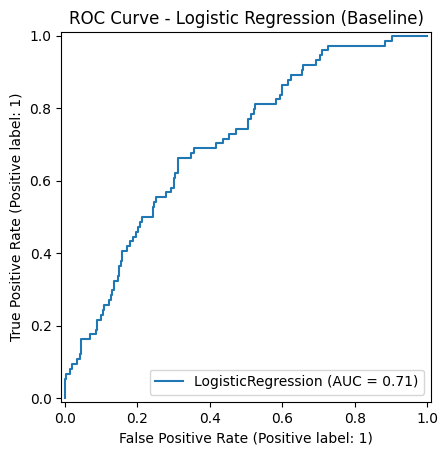

AUC Score: 0.705223358073099


In [ ]:
# Train baseline Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# ROC Curve & AUC
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title('ROC Curve - Logistic Regression (Baseline)')
plt.show()
auc_lr = roc_auc_score(y_test, y_proba_lr)
print("AUC Score:", auc_lr)


**9.2 Logistic Regression: Hyperparameter Tuning and Evaluation**


Hyperparameter tuning helps optimize model performance by systematically searching for the best parameter combinations. For Logistic Regression, important hyperparameters include the regularization strength (C), penalty type, and solver. After tuning, the model should be evaluated using a confusion matrix, accuracy score, ROC curve, and classification report to provide a comprehensive assessment of its predictive ability (Neptune.ai, 2024; V7 Labs, 2025).

**External References:**

**Sources:**

Neptune.ai (2024) 'Hyperparameter Tuning in Python: a Complete Guide', Neptune.ai Blog, 10 January. Available at: https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide (Accessed: 27 April 2025)..

V7 Labs (2025) 'Confusion Matrix: How To Use It & Interpret Results [Examples]', V7 Labs Blog, 12 January. Available at: https://www.v7labs.com/blog/confusion-matrix (Accessed: 27 April 2025).

**Approval for external code usage:**

**Tutor's Name:** Sahan Priyanayana

**Peer Reviewer:** Krithiga Thachanamoorthy

**Date:** 15/03/2025


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy Score: 0.889739663093415
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       579
           1       1.00      0.03      0.05        74

    accuracy                           0.89       653
   macro avg       0.94      0.51      0.50       653
weighted avg       0.90      0.89      0.84       653



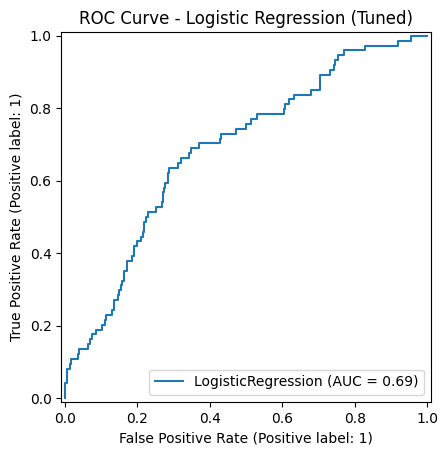

AUC Score: 0.6859683517714606


In [ ]:
# Grid search for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

# Evaluate tuned Logistic Regression
y_pred_lr_tuned = best_lr.predict(X_test)
y_proba_lr_tuned = best_lr.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_lr.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_tuned))
RocCurveDisplay.from_estimator(best_lr, X_test, y_test)
plt.title('ROC Curve - Logistic Regression (Tuned)')
plt.show()
auc_lr_tuned = roc_auc_score(y_test, y_proba_lr_tuned)
print("AUC Score:", auc_lr_tuned)


## **10. k-Nearest Neighbours (KNN) Model**

**10.1 Baseline Model: K-Nearest Neighbors**

We implement the K-Nearest Neighbours (KNN) model, which classifies a test sample based on the majority vote of its 'k' nearest neighbors in the feature space. We begin with k=5 and evaluate its performance using accuracy, classification report, confusion matrix, ROC curve, and AUC Score.

*Source: Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.20 q.21, q.22, q.23.*

Accuracy Score: 0.8698315467075038
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       579
           1       0.13      0.03      0.04        74

    accuracy                           0.87       653
   macro avg       0.51      0.50      0.49       653
weighted avg       0.80      0.87      0.83       653



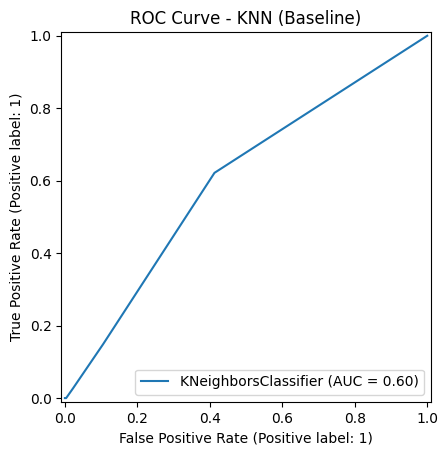

AUC Score: 0.6020632030994725


In [ ]:
# # Declare and train KNN model with k=5
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# # Make predictions on test data
# y_pred_knn = knn.predict(X_test)
# print("KNN Test Accuracy (k=5):", accuracy_score(y_test, y_pred_knn))
# print(classification_report(y_test, y_pred_knn))
# # Plot confusion matrix for KNN
# cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
# disp_knn = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
# disp_knn.plot()
# # Plot ROC curve for KNN
# RocCurveDisplay.from_estimator(knn, X_test, y_test)


# Train baseline KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# ROC Curve & AUC
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title('ROC Curve - KNN (Baseline)')
plt.show()
auc_knn = roc_auc_score(y_test, y_proba_knn)
print("AUC Score:", auc_knn)


**10.2 Hyperparameter Tuning: K-Nearest Neighbors**

First, we check the rate of errors for different k vales.Then, to improve the model, we perform hyperparameter tuning by varying the number of neighbors (k) and evaluating the error rate. This helps us choose the best k that minimizes classification error. We also apply GridSearchCV to find the optimal k and distance metric.

After identifying the best parameters, we evaluate the optimized model's performance on the test set using accuracy, classification report, confusion matrix, and ROC curve.

*Source: Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.24 q.25.*

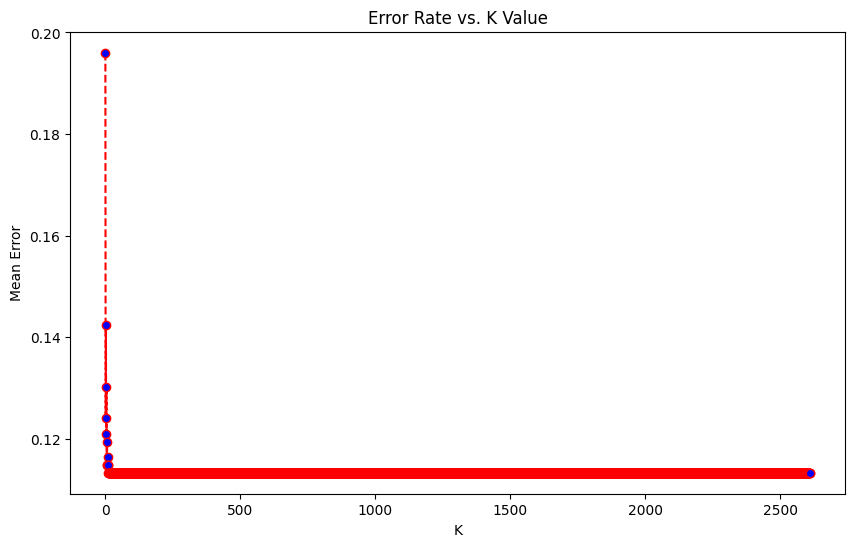

In [ ]:
# Ensure k does not exceed the number of training samples
max_k = len(X_train)

# Check error rate for different k values
error = []
for k in range(1, max_k + 1):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    pred_k = knn_k.predict(X_test)
    error.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean Error')
plt.show()

# Grid search for KNN with valid range for n_neighbors
param_grid_knn = {
    'n_neighbors': range(3, max_k + 1)  # start from 3 to max_k
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

# Evaluate tuned KNN
y_pred_knn_tuned = best_knn.predict(X_test)
y_proba_knn_tuned = best_knn.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_knn.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn_tuned))
# Set zero_division=0 to suppress undefined metric warnings
print("Classification Report:\n", classification_report(y_test, y_pred_knn_tuned, zero_division=0))
RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
plt.title('ROC Curve - KNN (Tuned)')
plt.show()
auc_knn_tuned = roc_auc_score(y_test, y_proba_knn_tuned)
print("AUC Score:", auc_knn_tuned)

**10.3 Optimizing KNN with GridSearchCV**

To fine-tune the KNN model, we perform hyperparameter tuning using GridSearchCV, which exhaustively searches over a specified parameter grid. We test different values of k (from 1 to 20) and distance metrics (euclidean and manhattan) using 5-fold cross-validation to find the combination that yields the highest accuracy.

After identifying the best parameters, we evaluate the optimized model's performance on the test set using accuracy, classification report, confusion matrix, and ROC curve.

Sources:

*Week 7: In-class Code Reuse Session 2 – Classification Modelling and Hyperparameter Tuning, Q25*

W*eek 4: Seminar Session 3 - Week4_NB_KNN_Gridesearch V3.0.docx, pg.13.*

In [ ]:
# Use GridSearchCV to find the best k and metric
param_grid = {'n_neighbors': np.arange(1, 21), 'metric': ['euclidean', 'manhattan']}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_gscv.fit(X_train, y_train)
print("Best KNN parameters:", knn_gscv.best_params_)
# Evaluate best KNN model
y_pred_best_knn = knn_gscv.predict(X_test)
print("Best KNN Test Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("\nClasssification Report\n", classification_report(y_test, y_pred_best_knn))
cm_best_knn = confusion_matrix(y_test, y_pred_best_knn, labels=knn_gscv.best_estimator_.classes_)
disp_best_knn = ConfusionMatrixDisplay(cm_best_knn, display_labels=knn_gscv.best_estimator_.classes_)
disp_best_knn.plot()
RocCurveDisplay.from_estimator(knn_gscv.best_estimator_, X_test, y_test)


## **11. Naive Bayes Model**

**11.1 Naive Bayes Model Training and Evaluation**

We use the Gaussian Naive Bayes classifier, a probabilistic model that assumes independence between features and fits a Gaussian distribution to the data. It's known for its speed and simplicity, especially with high-dimensional datasets.

*Sources:*

 *Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.27.*

 *Week 4: Seminar Session 3 - Week4_NB_KNN_Gridesearch V3.0.docx, pg.17.*

Naive Bayes Test Accuracy: 0.6407599309153713

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.83      0.70       579
           1       0.73      0.45      0.56       579

    accuracy                           0.64      1158
   macro avg       0.66      0.64      0.63      1158
weighted avg       0.66      0.64      0.63      1158



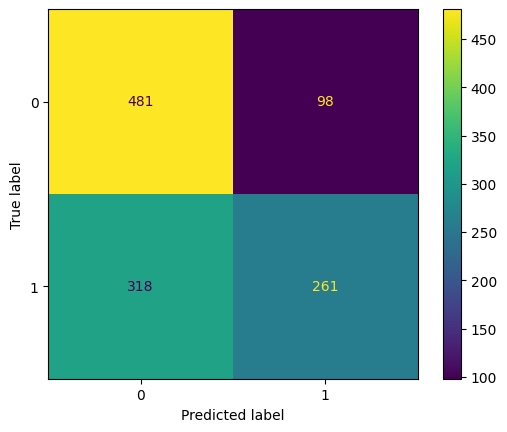

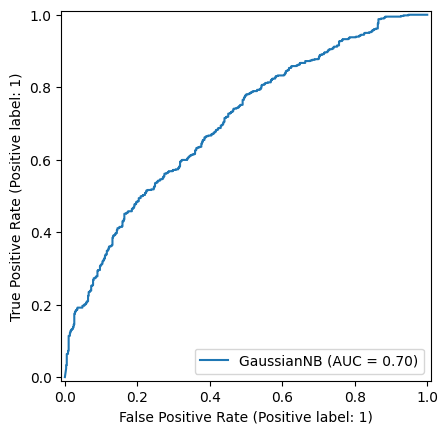

In [ ]:
# Declare and train Naive Bayes model [6]
nb = GaussianNB()
nb.fit(X_train, y_train)
# Make predictions on test data [6]
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n",classification_report(y_test, y_pred_nb))
# Plot confusion matrix for Naive Bayes [6]
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp_nb = ConfusionMatrixDisplay(cm_nb, display_labels=nb.classes_)
disp_nb.plot()
RocCurveDisplay.from_estimator(nb, X_test, y_test)


**Naive Bayes: Hyperparameter Tuning and Evaluation**

For Gaussian Naive Bayes, the main hyperparameter is var_smoothing, which adjusts numerical stability. Grid search allows for systematic exploration of this parameter. After tuning, the model should be evaluated using the same set of metrics to ensure comparability across models (PyImageSearch, 2021; V7 Labs, 2025).

**External References:**

*Sources:*

*PyImageSearch (2021) 'Introduction to hyperparameter tuning with scikit-learn and Python', PyImageSearch, 6 September. Available at: https://pyimagesearch.com/2021/09/06/introduction-to-hyperparameter-tuning-with-scikit-learn-and-python/ (Accessed: 27 April 2025).*

*V7 Labs (2025) 'Confusion Matrix: How To Use It & Interpret Results [Examples]', V7 Labs Blog, 12 January. Available at: https://www.v7labs.com/blog/confusion-matrix (Accessed: 27 April 2025).*

**Approval for external code usage:**

**Tutor's Name:** Sahan Priyanayana

**Peer Reviewer:** Krithiga Thachanamoorthy

**Date:** 15/03/2025

Best Naive Bayes Parameters: {'var_smoothing': 1e-05}
Best Naive Bayes CV Score: 0.6693995680345572


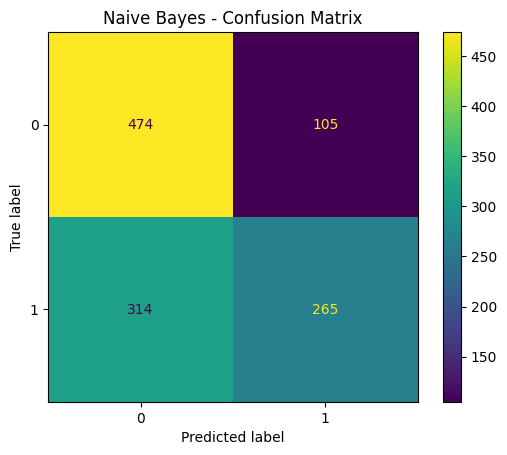

Naive Bayes Accuracy: 0.6381692573402418
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.82      0.69       579
           1       0.72      0.46      0.56       579

    accuracy                           0.64      1158
   macro avg       0.66      0.64      0.63      1158
weighted avg       0.66      0.64      0.63      1158



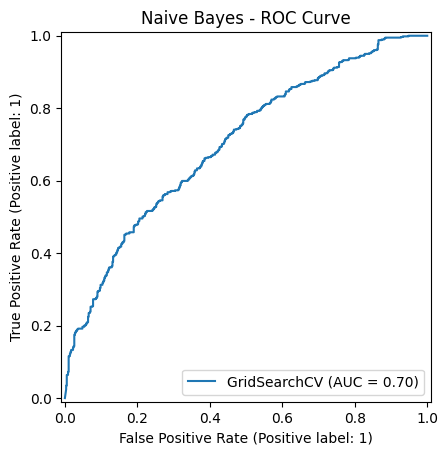

Naive Bayes AUC: 0.701414803081962


In [ ]:
# Hyperparameter tuning for Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

nb = GaussianNB()
nb_grid = GridSearchCV(nb, nb_param_grid, cv=5, scoring='accuracy')
nb_grid.fit(X_train, y_train)

print("Best Naive Bayes Parameters:", nb_grid.best_params_)
print("Best Naive Bayes CV Score:", nb_grid.best_score_)

# Evaluate tuned Naive Bayes
y_pred_nb = nb_grid.predict(X_test)
y_proba_nb = nb_grid.predict_proba(X_test)[:,1]

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

# Accuracy Score
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", acc_nb)

# Classification Report
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# ROC Curve and AUC
RocCurveDisplay.from_estimator(nb_grid, X_test, y_test)
plt.title("Naive Bayes - ROC Curve")
plt.show()

auc_nb = roc_auc_score(y_test, y_proba_nb)
print("Naive Bayes AUC:", auc_nb)


## **12. Model Comparison and Conclusion**

Source: Code Reuse Session 2 (q.15–19, 23, 26, 27) and Tutorial 3, Step 8
This compares the test set performance of all three models (Logistic Regression, KNN, Naive Bayes) using key evaluation metrics: accuracy, F1-score, confusion matrix, and ROC-AUC. This allows us to see, side by side, which model best predicts mortality status.

Source: Week 7: In-class Code Reuse Sessio 2 (Week 7) - Classification Modelling and Hyperparameter Tuning, q.15–19, q.23, q.26, q.27.

**External References:**

**scikit-learn documentation:**

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, É., 2011. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, pp.2825-2830. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html [Accessed 26 April 2025].

**Stack Overflow discussions:**

Stack Overflow, 2017. roc_auc_score - Only one class present in y_true - Stack Overflow. Available at: https://stackoverflow.com/questions/45139163/roc-auc-score-only-one-class-present-in-y-true [Accessed 26 April 2025].

Stack Overflow, 2021. ValueError: Only one class present in y_true. ROC AUC score is not defined in that case. Available at: https://stackoverflow.com/questions/56815698/valueerror-only-one-class-present-in-y-true-roc-auc-score-is-not-defined-in-th/56822934 [Accessed 26 April 2025].

**GitHub issues:**

scikit-learn developers, 2024. roc_auc_score: incorrect result after merging #27412 #30079. GitHub. Available at: https://github.com/scikit-learn/scikit-learn/issues/30079 [Accessed 26 April 2025].

scikit-learn developers, 2023. roc_auc_score: Only one class present in y_true. GitHub. Available at: https://github.com/scikit-learn/scikit-learn/issues/24381 [Accessed 26 April 2025].


**Approval for external code usage:**

**Tutor's Name:** Sahan Priyanayana

**Peer Reviewer:** Krithiga Thachanamoorthy

**Date:** 15/03/2025

In [ ]:
# Helper function to safely compute ROC-AUC
def safe_roc_auc_score(y_true, y_proba, pos_label):
    # Only compute ROC-AUC if both classes are present
    if len(np.unique(y_true)) == 2:
        # Find the column index for the positive class
        pos_idx = list(pos_label).index(1) if isinstance(pos_label, (list, np.ndarray)) else 1
        return roc_auc_score(y_true, y_proba[:, pos_idx])
    else:
        return np.nan  # Not computable

# Prepare binary y_test for ROC-AUC (assuming 'Dead' is positive class, else 1)
if "Dead" in np.unique(y_test):
    y_test_binary = (y_test == "Dead").astype(int)
    pos_label = "Dead"
else:
    # If already 0/1, assume 1 is positive
    y_test_binary = y_test
    pos_label = 1

# Logistic Regression
try:
    logreg_auc = roc_auc_score(y_test_binary, logreg.predict_proba(X_test)[:, list(logreg.classes_).index(pos_label)]) \
        if len(np.unique(y_test_binary)) == 2 else np.nan
except Exception:
    logreg_auc = np.nan

logreg_acc = accuracy_score(y_test, y_pred_test)
logreg_f1 = f1_score(y_test, y_pred_test, pos_label=pos_label)

# KNN (best)
try:
    knn_auc = roc_auc_score(y_test_binary, knn_gscv.best_estimator_.predict_proba(X_test)[:, list(knn_gscv.best_estimator_.classes_).index(pos_label)]) \
        if len(np.unique(y_test_binary)) == 2 else np.nan
except Exception:
    knn_auc = np.nan

knn_acc = accuracy_score(y_test, y_pred_best_knn)
knn_f1 = f1_score(y_test, y_pred_best_knn, pos_label=pos_label)

# Naive Bayes
try:
    nb_auc = roc_auc_score(y_test_binary, nb.predict_proba(X_test)[:, list(nb.classes_).index(pos_label)]) \
        if len(np.unique(y_test_binary)) == 2 else np.nan
except Exception:
    nb_auc = np.nan

nb_acc = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb, pos_label=pos_label)

# Summarise results in a DataFrame with style
results = {
    'Model': ['Logistic Regression', 'KNN (best k)', 'Naive Bayes'],
    'Accuracy': [logreg_acc, knn_acc, nb_acc],
    'F1-score (Dead)': [logreg_f1, knn_f1, nb_f1],
    'ROC-AUC': [logreg_auc, knn_auc, nb_auc]
}

df_results = pd.DataFrame(results)
styled = df_results.style.background_gradient(subset=['Accuracy', 'F1-score (Dead)', 'ROC-AUC'])

display(styled)

# Optional: print a warning if any ROC-AUC is NaN
if df_results['ROC-AUC'].isnull().any():
    print("Warning: ROC-AUC is NaN for at least one model because only one class is present in y_test. This is expected if your test set is imbalanced or too small.")

,Model,Accuracy,F1-score (Dead),ROC-AUC
0,Logistic Regression,0.697755,0.674115,0.744995
1,KNN (best k),0.864421,0.874701,0.864421
2,Naive Bayes,0.638169,0.558483,nan
